Building Permit DSBI Project 

In [69]:
#Importing the necessary libraries
%pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Importing the evaluation parameters
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Connecting CSV File

In [2]:
df = pd.read_csv('Building_Permits_20250331.csv')
df.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1
0,3001776-EX,Commercial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,NaN,NaN,NaN,NaN,...,3001776-LU,2701 EASTLAKE AVE E,SEATTLE,WA,98102.0,NaN,https://services.seattle.gov/portal/customize/...,47.644647,-122.326104,"(47.64464664, -122.32610372)"
1,3002070-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land use perm...,NaN,NaN,NaN,NaN,...,3002070-LU,6519 S BANGOR ST,SEATTLE,WA,98178.0,NaN,https://services.seattle.gov/portal/customize/...,47.505890,-122.251721,"(47.50588981, -122.25172068)"
2,3002715-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: LAND USE PERM...,NaN,NaN,NaN,NaN,...,3002715-LU,5509 13TH AVE S,SEATTLE,WA,98108.0,NaN,https://services.seattle.gov/portal/customize/...,47.553103,-122.316554,"(47.55310307, -122.31655355)"
3,3002774-EX,NaN,NaN,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANACELED 8-...,NaN,NaN,NaN,NaN,...,3002774-LU,320 NE 97TH ST,SEATTLE,WA,98115.0,NaN,https://services.seattle.gov/portal/customize/...,47.699438,-122.324688,"(47.69943793, -122.32468755)"
4,3002989-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Council land ...,NaN,NaN,NaN,NaN,...,3002989-LU,3012 NE 140TH ST,SEATTLE,WA,98125.0,NaN,https://services.seattle.gov/portal/customize/...,47.730305,-122.296016,"(47.73030516, -122.29601552)"


Data Preprocessing (Handle missing values, duplicate records. Perform Data transformation [scaling, encoding, normalization])

In [3]:
df.describe()

,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,OriginalZip,Latitude,Longitude
count,32614.000000,85214.000000,85214.000000,1.447260e+05,167855.000000,176629.000000,176629.000000
mean,32.143650,0.215059,2.990717,1.294465e+06,98103.941604,47.625609,-122.334216
std,5537.306975,2.248925,22.912343,9.343687e+07,1266.813438,0.055795,0.038286
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,47.488602,-122.430368
25%,0.000000,0.000000,0.000000,1.683250e+04,98106.000000,47.582517,-122.363454
50%,0.000000,0.000000,0.000000,6.892700e+04,98116.000000,47.628046,-122.333558
75%,1.000000,0.000000,1.000000,2.626640e+05,98125.000000,47.670644,-122.303988
max,1000000.000000,272.000000,891.000000,2.500000e+10,98199.000000,47.734009,-122.221100


In [4]:
df.info()
#This provides information about the data types, non-null values, and memory usage of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179762 entries, 0 to 179761
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PermitNum              179762 non-null  object 
 1   PermitClass            173018 non-null  object 
 2   PermitClassMapped      173018 non-null  object 
 3   PermitTypeMapped       179762 non-null  object 
 4   PermitTypeDesc         168247 non-null  object 
 5   Description            179164 non-null  object 
 6   HousingUnits           32614 non-null   float64
 7   HousingUnitsRemoved    85214 non-null   float64
 8   HousingUnitsAdded      85214 non-null   float64
 9   EstProjectCost         144726 non-null  float64
 10  AppliedDate            137759 non-null  object 
 11  IssuedDate             130720 non-null  object 
 12  ExpiresDate            130883 non-null  object 
 13  CompletedDate          99402 non-null   object 
 14  StatusCurrent          179762 non-nu

In [5]:
#This will return the count of null (missing) values for each column
df.isnull().sum()

PermitNum                     0
PermitClass                6744
PermitClassMapped          6744
PermitTypeMapped              0
PermitTypeDesc            11515
Description                 598
HousingUnits             147148
HousingUnitsRemoved       94548
HousingUnitsAdded         94548
EstProjectCost            35036
AppliedDate               42003
IssuedDate                49042
ExpiresDate               48879
CompletedDate             80360
StatusCurrent                 0
RelatedMup               165776
OriginalAddress1            769
OriginalCity               7836
OriginalState              7713
OriginalZip               11907
ContractorCompanyName    150468
Link                          0
Latitude                   3133
Longitude                  3133
Location1                  3133
dtype: int64

In [6]:
#code to drop the columns which are not required for the analysis
columns_to_drop = [
    "Description", "HousingUnits", "HousingUnitsRemoved", "HousingUnitsAdded", 
    "RelatedMup", "OriginalAddress1", "OriginalZip", "ContractorCompanyName", "Link"
]
df = df.drop(columns=columns_to_drop)
# Verify the remaining columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179762 entries, 0 to 179761
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PermitNum          179762 non-null  object 
 1   PermitClass        173018 non-null  object 
 2   PermitClassMapped  173018 non-null  object 
 3   PermitTypeMapped   179762 non-null  object 
 4   PermitTypeDesc     168247 non-null  object 
 5   EstProjectCost     144726 non-null  float64
 6   AppliedDate        137759 non-null  object 
 7   IssuedDate         130720 non-null  object 
 8   ExpiresDate        130883 non-null  object 
 9   CompletedDate      99402 non-null   object 
 10  StatusCurrent      179762 non-null  object 
 11  OriginalCity       171926 non-null  object 
 12  OriginalState      172049 non-null  object 
 13  Latitude           176629 non-null  float64
 14  Longitude          176629 non-null  float64
 15  Location1          176629 non-null  object 
dtypes:

In [7]:
#this will return the count of null (missing) values for each column again
df.isnull().sum()

PermitNum                0
PermitClass           6744
PermitClassMapped     6744
PermitTypeMapped         0
PermitTypeDesc       11515
EstProjectCost       35036
AppliedDate          42003
IssuedDate           49042
ExpiresDate          48879
CompletedDate        80360
StatusCurrent            0
OriginalCity          7836
OriginalState         7713
Latitude              3133
Longitude             3133
Location1             3133
dtype: int64

In [8]:
import pandas as pd
from datetime import datetime

# Function to parse dates with multiple formats
def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    # List of possible date formats in your dataset
    date_formats = [
        '%Y-%m-%d',      # 2025-03-31
        '%m/%d/%Y',      # 03/31/2025
        '%d-%b-%y',      # 31-Mar-25
        '%b %d, %Y',     # Mar 31, 2025
        '%Y%m%d',        # 20250331
        '%m-%d-%Y',      # 03-31-2025
        '%d/%m/%Y',      # 31/03/2025 (European format)
        '%Y-%d-%m',      # 2025-31-03 (alternative format)
    ]
    
    for fmt in date_formats:
        try:
            return datetime.strptime(str(date_str), fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

# Convert date columns using the flexible parser
date_cols = ["AppliedDate", "IssuedDate", "ExpiresDate", "CompletedDate"]
for col in date_cols:
    df[col] = df[col].apply(parse_date)

# Now apply your filtering logic exactly as you specified
condition_to_drop = (
    df["AppliedDate"].isnull() |  # Drop if AppliedDate is missing (invalid application)
    (df["IssuedDate"].isnull() & df["ExpiresDate"].isnull()) |  # Drop if neither issued nor expired
    (df["IssuedDate"].notnull() & df["CompletedDate"].isnull() & df["ExpiresDate"].isnull())  # Drop if issued but no completion or expiry
)

# Apply the filtering
df = df[~condition_to_drop]

# Verify the updated dataset
print(df.info())

# Optional: Convert all dates to a standard format for display/export
# (Note: internally they're still datetime objects)
for col in date_cols:
    df[col] = df[col].dt.strftime('%Y-%m-%d')  # ISO standard format

print("\nSample dates after standardization:")
print(df[date_cols].head())

# # Verify the updated dataset
# print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 129384 entries, 41 to 179750
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PermitNum          129384 non-null  object        
 1   PermitClass        126022 non-null  object        
 2   PermitClassMapped  126022 non-null  object        
 3   PermitTypeMapped   129384 non-null  object        
 4   PermitTypeDesc     125553 non-null  object        
 5   EstProjectCost     117611 non-null  float64       
 6   AppliedDate        129384 non-null  datetime64[ns]
 7   IssuedDate         129304 non-null  datetime64[ns]
 8   ExpiresDate        129379 non-null  datetime64[ns]
 9   CompletedDate      98847 non-null   datetime64[ns]
 10  StatusCurrent      129384 non-null  object        
 11  OriginalCity       125401 non-null  object        
 12  OriginalState      125516 non-null  object        
 13  Latitude           127269 non-null  float64     

In [9]:
df.isnull().sum()

PermitNum                0
PermitClass           3362
PermitClassMapped     3362
PermitTypeMapped         0
PermitTypeDesc        3831
EstProjectCost       11773
AppliedDate              0
IssuedDate              80
ExpiresDate              5
CompletedDate        30537
StatusCurrent            0
OriginalCity          3983
OriginalState         3868
Latitude              2115
Longitude             2115
Location1             2115
dtype: int64

In [10]:
# Drop rows where any of these columns have null values
df = df.dropna(subset=["Latitude", "Longitude", "Location1"])

In [11]:
df.isnull().sum()

PermitNum                0
PermitClass           3301
PermitClassMapped     3301
PermitTypeMapped         0
PermitTypeDesc        3586
EstProjectCost       11269
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity          3916
OriginalState         3805
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [12]:
# Fill categorical missing values with mode (most frequent value)
categorical_cols = ["PermitClass", "PermitClassMapped", "PermitTypeDesc", "OriginalCity", "OriginalState"]
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df.isnull().sum()

PermitNum                0
PermitClass              0
PermitClassMapped        0
PermitTypeMapped         0
PermitTypeDesc           0
EstProjectCost       11269
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity             0
OriginalState            0
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [14]:
# Fill numerical missing values with median
numerical_cols = ["EstProjectCost"]
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [15]:
df.isnull().sum()
# here we are completing the missing values handling part in data preprocessing 

PermitNum                0
PermitClass              0
PermitClassMapped        0
PermitTypeMapped         0
PermitTypeDesc           0
EstProjectCost           0
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity             0
OriginalState            0
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [16]:
# Checking for duplicates in the dataset
df.duplicated().sum()

# no duplicates found in the dataset

np.int64(0)

In [18]:
#encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["PermitClass", "PermitClassMapped", "PermitTypeMapped", "PermitTypeDesc", "StatusCurrent", "OriginalCity", "OriginalState"]
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Verify encoding
print(df.head())

     PermitNum  PermitClass  PermitClassMapped  PermitTypeMapped  \
41  6061900-CN            4                  1                 0   
42  6061927-CN            4                  1                 0   
44  6062161-CN            4                  1                 0   
45  6062214-CN            0                  0                 0   
47  6062514-CN            0                  0                 0   

    PermitTypeDesc  EstProjectCost AppliedDate  IssuedDate ExpiresDate  \
41               0         70000.0  2005-08-15  2005-09-30  2007-03-30   
42               0          3087.0  2005-10-03  2005-10-03  2007-04-03   
44               0         10000.0  2005-12-06  2005-12-06  2007-06-06   
45               0        515000.0  2005-09-16  2005-10-17  2007-04-17   
47               0        551432.0  2006-05-30  2007-05-11  2013-05-11   

   CompletedDate  StatusCurrent  OriginalCity  OriginalState   Latitude  \
41    2005-12-07              5             2              0  47.593412

In [25]:
# feature scaling and normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ['PermitNum']
numeric_cols = [col for col in numerical_cols if col not in exclude_cols]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#verifying the scaling
# print(df.head())

print(df[numeric_cols].describe())

        PermitClass  PermitClassMapped  PermitTypeMapped  PermitTypeDesc  \
count  1.272690e+05       1.272690e+05      1.272690e+05    1.272690e+05   
mean  -2.501184e-17       3.305136e-17     -1.518576e-17    3.662448e-17   
std    1.000004e+00       1.000004e+00      1.000004e+00    1.000004e+00   
min   -1.723680e+00      -1.633114e+00     -3.035232e-01   -5.797973e-01   
25%   -5.257397e-01      -1.633114e+00     -3.035232e-01   -5.797973e-01   
50%    6.722008e-01       6.123272e-01     -3.035232e-01   -5.797973e-01   
75%    6.722008e-01       6.123272e-01     -3.035232e-01    8.839821e-01   
max    1.271171e+00       6.123272e-01      9.392536e+00    2.713706e+00   

       EstProjectCost  StatusCurrent  OriginalCity  OriginalState  \
count   127269.000000   1.272690e+05  1.272690e+05   1.272690e+05   
mean         0.000000   8.575487e-17  1.178013e-17   1.535325e-19   
std          1.000004   1.000004e+00  1.000004e+00   1.000004e+00   
min         -0.106343  -9.099159e+00 -9

In [28]:
#Outlier detection and removal using InterQuartile Range (IQR) method
# Store original row count
original_rows = df.shape[0]

# IQR-based outlier removal
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Calculate removal statistics
removed_rows = original_rows - df.shape[0]
print(f"\n=== Outlier Removal Results ===")
print(f"Removed {removed_rows} rows ({removed_rows/original_rows:.1%}) as outliers")
print(f"Remaining rows: {df.shape[0]}")

# verifying the outlier removal
print(df.head())


=== Outlier Removal Results ===
Removed 60113 rows (47.2%) as outliers
Remaining rows: 67156
    PermitClass  PermitClassMapped  PermitTypeMapped  PermitTypeDesc  \
41     0.672201           0.612327         -0.303523       -0.579797   
42     0.672201           0.612327         -0.303523       -0.579797   
44     0.672201           0.612327         -0.303523       -0.579797   
48     0.672201           0.612327         -0.303523       -0.579797   
50    -1.723680          -1.633114         -0.303523       -0.579797   

    EstProjectCost AppliedDate  IssuedDate ExpiresDate CompletedDate  \
41       -0.091484  2005-08-15  2005-09-30  2007-03-30    2005-12-07   
42       -0.105688  2005-10-03  2005-10-03  2007-04-03    2006-02-21   
44       -0.104221  2005-12-06  2005-12-06  2007-06-06           NaN   
48       -0.104900  2005-08-02  2005-08-02  2007-02-02           NaN   
50       -0.105919  2005-08-19  2005-08-19  2007-02-19    2005-12-20   

    StatusCurrent  OriginalCity  Origina

Exploratory Data Analysis of the given Dataset

In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Summary Statistics Function
def summary_statistics(df):
    print("Summary Statistics:")
    print(df.describe())  # Basic statistics for numerical columns
    
    print("\nMissing Values:")
    print(df.isnull().sum())  # Checking for missing values
    
    print("\nData Types:")
    print(df.dtypes)  # Checking data types

# Call the function
summary_statistics(df)

Summary Statistics:
        PermitClass  PermitClassMapped  PermitTypeMapped  PermitTypeDesc  \
count  67156.000000       67156.000000      67156.000000    67156.000000   
mean      -0.007443          -0.014267         -0.303523       -0.579797   
std        1.028473           1.007162          0.000000        0.000000   
min       -1.723680          -1.633114         -0.303523       -0.579797   
25%       -1.723680          -1.633114         -0.303523       -0.579797   
50%        0.672201           0.612327         -0.303523       -0.579797   
75%        0.672201           0.612327         -0.303523       -0.579797   
max        1.271171           0.612327         -0.303523       -0.579797   

       EstProjectCost  StatusCurrent  OriginalCity  OriginalState  \
count    67156.000000   6.715600e+04  6.715600e+04   6.715600e+04   
mean        -0.095848  -3.588190e-01 -1.299589e-02  -2.803112e-03   
std          0.011211   1.110231e-16  8.673682e-18   4.336841e-19   
min         -0.1063

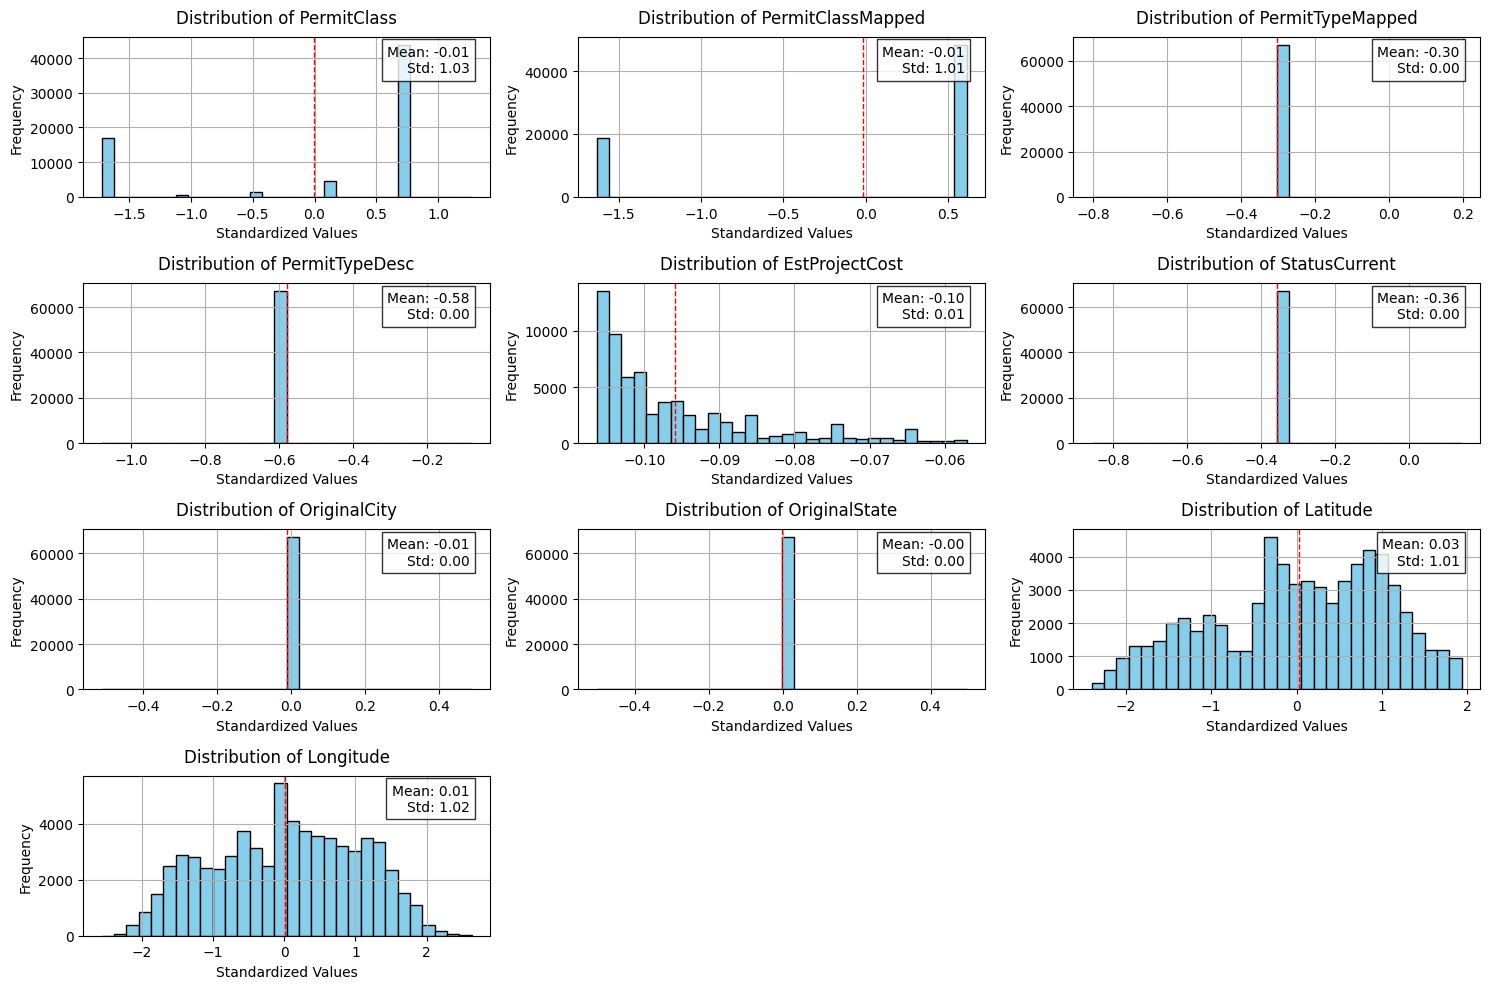

In [31]:
# Ploting the Univariate Analysis of numerical data
fig, axes = plt.subplots(nrows=len(numeric_cols)//3 + 1, 
                        ncols=3, 
                        figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    df[col].hist(ax=ax, bins=30, color='skyblue', edgecolor='black')
    
    # Customize axis labels and titles
    ax.set_xlabel('Standardized Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Distribution of {col}', fontsize=12, pad=10)
    
    # Add mean/std annotation
    ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)
    ax.text(0.95, 0.95, 
            f'Mean: {df[col].mean():.2f}\nStd: {df[col].std():.2f}',
            transform=ax.transAxes,
            ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.8))

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

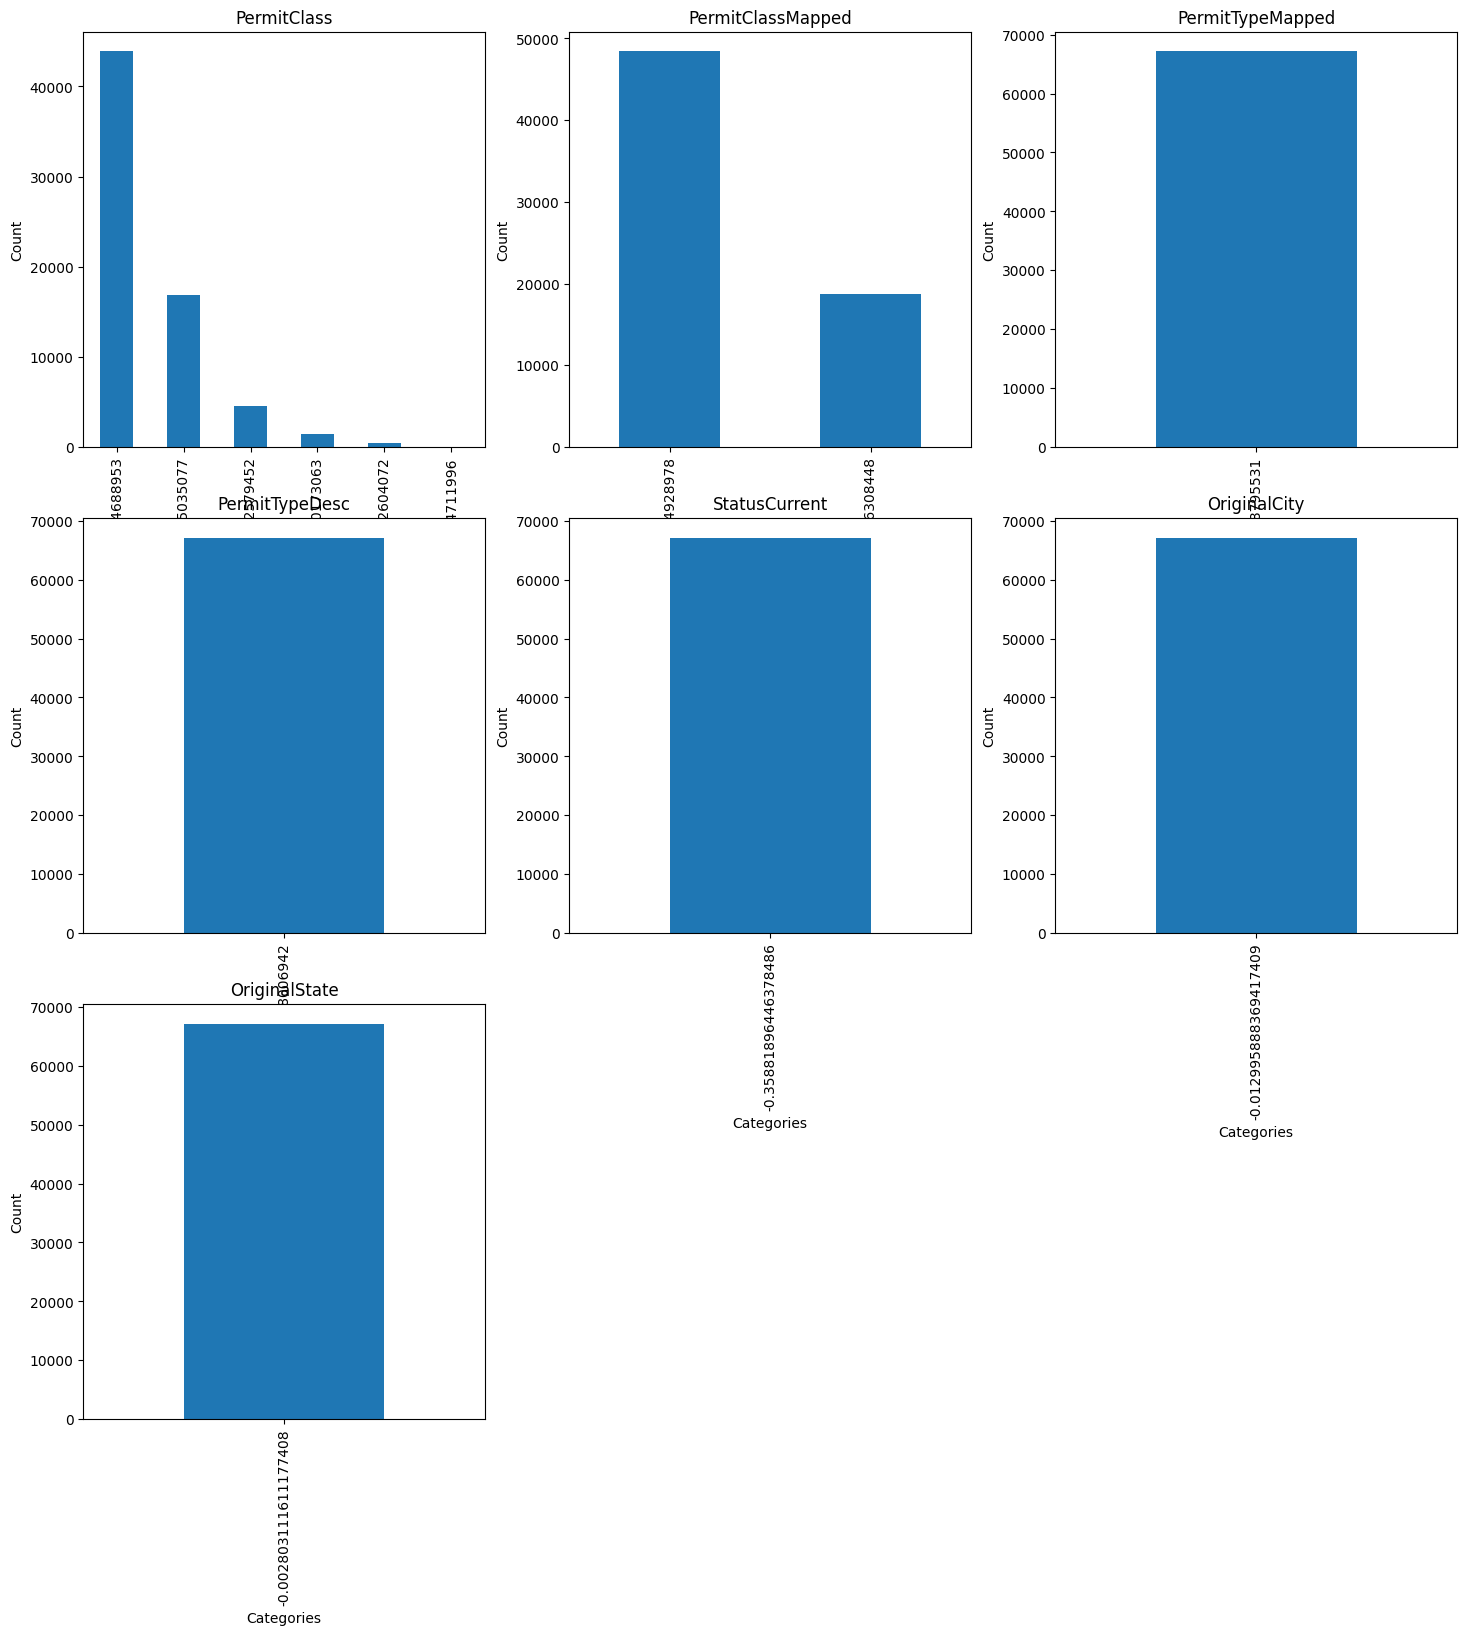

In [37]:
# Plotting the Univariate Analysis of categorical data
# Filter categorical columns with fewer than 10 unique values
plot_cols = [col for col in categorical_cols if df[col].nunique() < 10]

# Calculate number of subplots needed
n_cols = min(len(plot_cols), 9)  # Maximum of 9 plots (3x3 grid)
n_rows = math.ceil(n_cols / 3)

# Create figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
fig.tight_layout(pad=3.0)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(plot_cols[:9]):  # Only plot first 9 if more exist
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Categories')  # X-axis label
    axes[i].set_ylabel('Count')       # Y-axis label

# Hide any unused subplots
for j in range(i+1, 9):
    axes[j].axis('off')

plt.show()

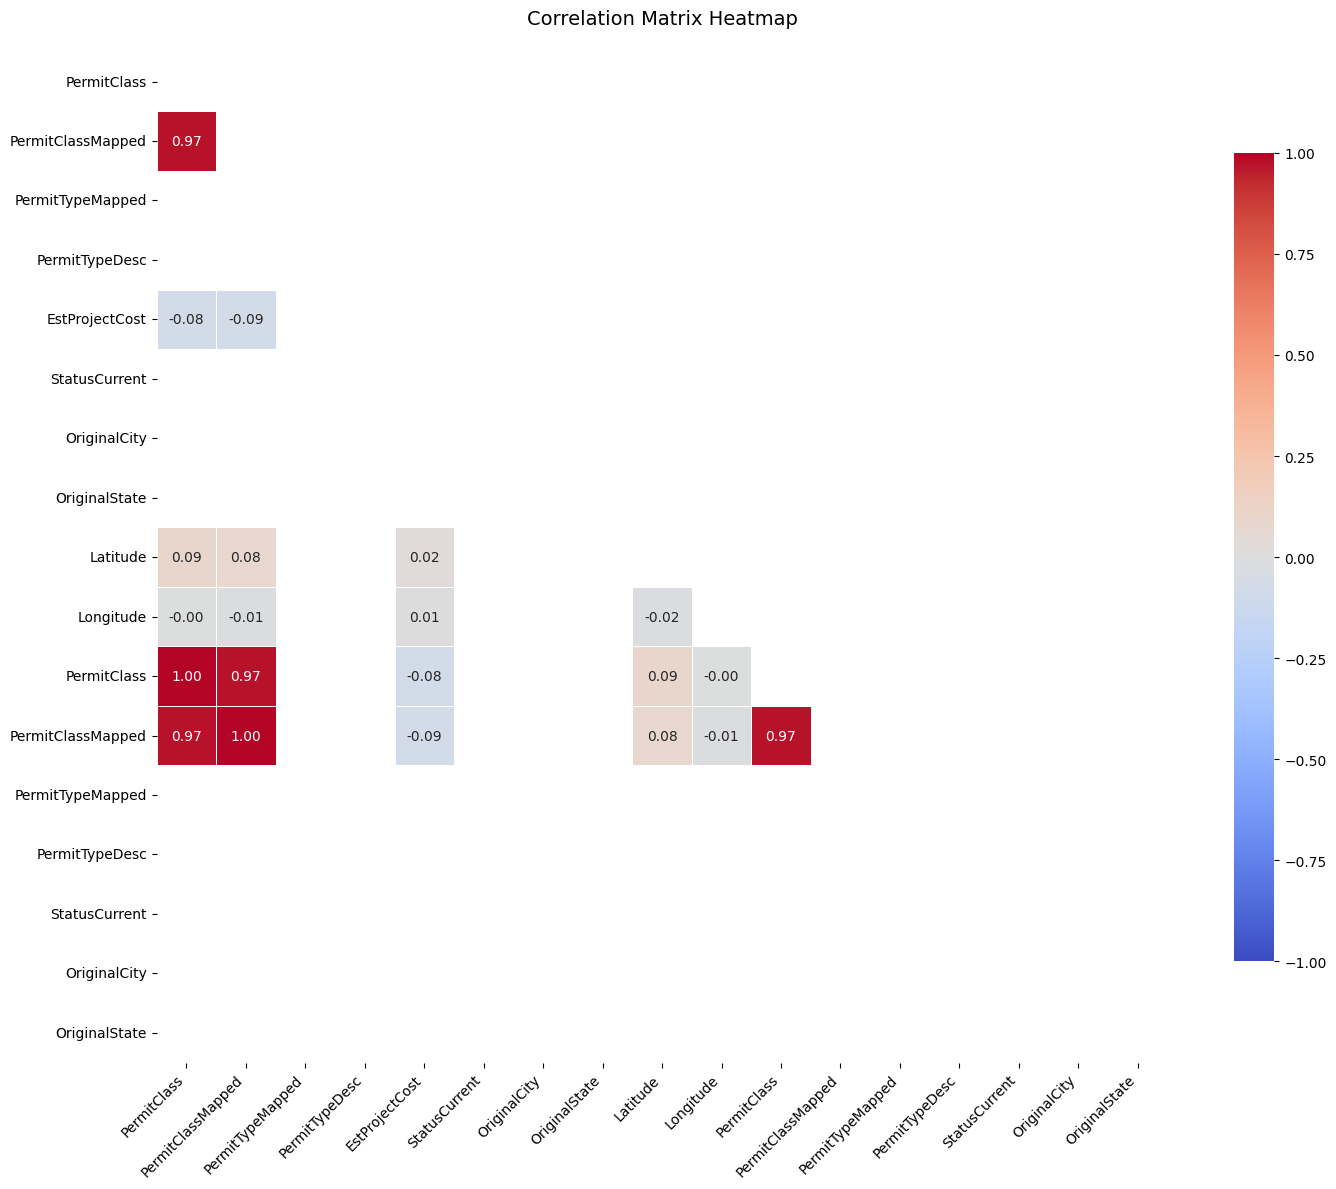

In [41]:
# 1. Combine the columns for analysis
analysis_cols = numeric_cols + categorical_cols

# 2. Calculate correlation matrix
corr_matrix = df[analysis_cols].corr()

# 3. Create the heatmap with proper settings
plt.figure(figsize=(15, 12))

# Create mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create heatmap with improved settings
ax = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

# Improve labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add title
plt.title("Correlation Matrix Heatmap", pad=20, fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

In [44]:
# Feature Engineering Function
# Convert date columns from strings to datetime
date_cols = ['AppliedDate', 'IssuedDate', 'CompletedDate']
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# Now calculate day differences
df['ProcessingDays'] = (df['IssuedDate'] - df['AppliedDate']).dt.days
df['CompletionDays'] = (df['CompletedDate'] - df['IssuedDate']).dt.days

#print the dates
print(df[['AppliedDate', 'IssuedDate', 'ProcessingDays', 'CompletedDate', 'CompletionDays']].head())

   AppliedDate IssuedDate  ProcessingDays CompletedDate  CompletionDays
41  2005-08-15 2005-09-30            46.0    2005-12-07            68.0
42  2005-10-03 2005-10-03             0.0    2006-02-21           141.0
44  2005-12-06 2005-12-06             0.0           NaT             NaN
48  2005-08-02 2005-08-02             0.0           NaT             NaN
50  2005-08-19 2005-08-19             0.0    2005-12-20           123.0


C:\Users\A R Mehra\AppData\Local\Temp\ipykernel_11780\4279282238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_before.index, y=missing_before.values, palette="rocket")
C:\Users\A R Mehra\AppData\Local\Temp\ipykernel_11780\4279282238.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_after.index, y=missing_after.values, palette="mako")
C:\Users\A R Mehra\AppData\Local\Temp\ipykernel_11780\4279282238.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Records Removed', 'Records Kept'],
C:\Users\A R Mehra\AppDat

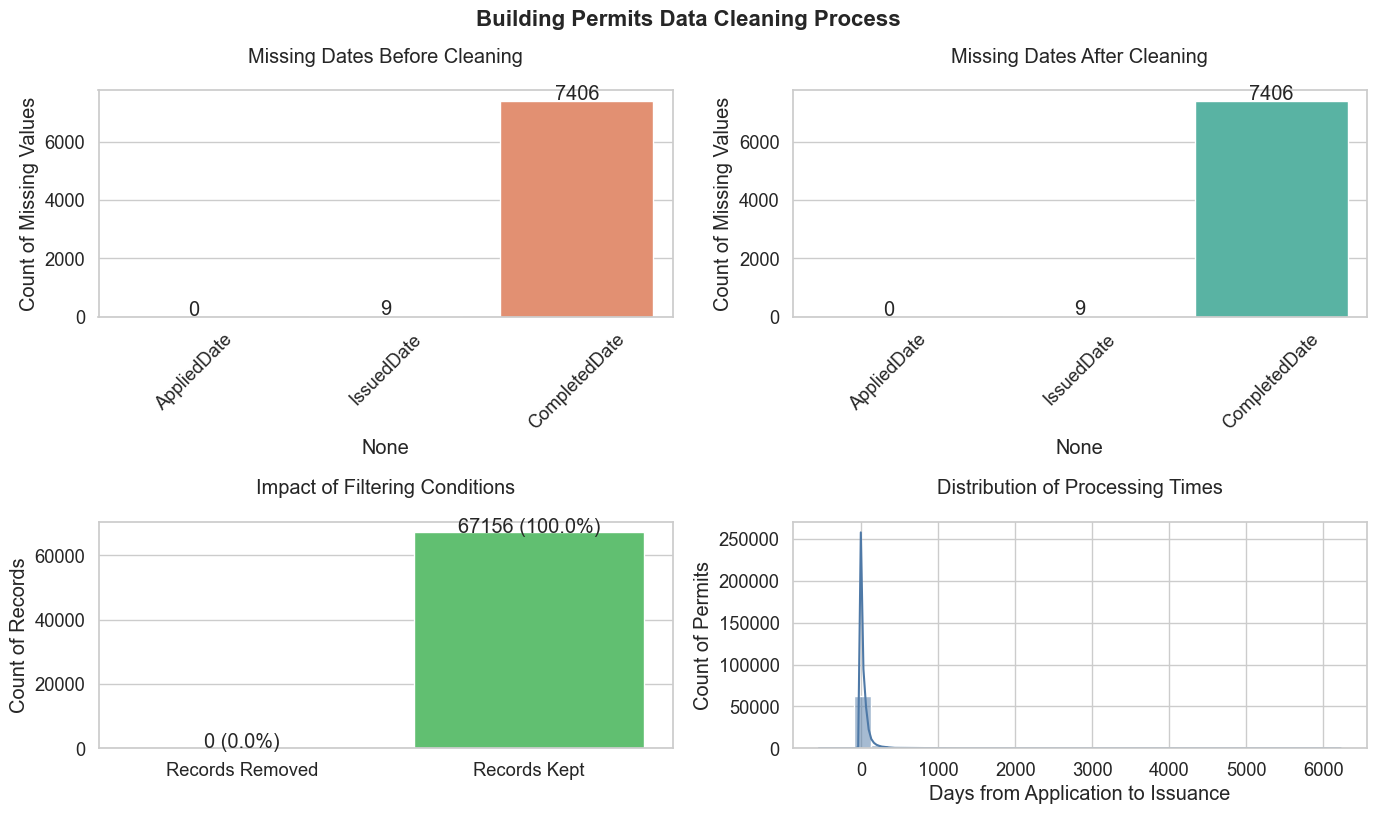

In [46]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 8))

# 1. Before Cleaning Visualization
plt.subplot(2, 2, 1)
missing_before = df[date_cols].isnull().sum()
sns.barplot(x=missing_before.index, y=missing_before.values, palette="rocket")
plt.title("Missing Dates Before Cleaning", pad=20)
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)

# Add the exact numbers on top of bars
for i, v in enumerate(missing_before.values):
    plt.text(i, v + 50, str(v), ha='center')

# 2. Apply your filtering conditions
condition_to_drop = (
    df["AppliedDate"].isnull() |
    (df["IssuedDate"].isnull() & df["ExpiresDate"].isnull()) |
    (df["IssuedDate"].notnull() & df["CompletedDate"].isnull() & df["ExpiresDate"].isnull())
)
filtered_df = df[~condition_to_drop]

# 3. After Cleaning Visualization
plt.subplot(2, 2, 2)
missing_after = filtered_df[date_cols].isnull().sum()
sns.barplot(x=missing_after.index, y=missing_after.values, palette="mako")
plt.title("Missing Dates After Cleaning", pad=20)
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)

# Add the exact numbers on top of bars
for i, v in enumerate(missing_after.values):
    plt.text(i, v + 50, str(v), ha='center')

# 4. Records Removed Visualization
plt.subplot(2, 2, 3)
removed_count = len(df) - len(filtered_df)
remaining_count = len(filtered_df)
sns.barplot(x=['Records Removed', 'Records Kept'], 
            y=[removed_count, remaining_count],
            palette=['#ff6b6b', '#51cf66'])
plt.title("Impact of Filtering Conditions", pad=20)
plt.ylabel("Count of Records")

# Add percentage annotations
total = len(df)
for i, v in enumerate([removed_count, remaining_count]):
    plt.text(i, v + 50, f"{v} ({v/total:.1%})", ha='center')

# 5. Timeline Analysis (Applied vs Issued Dates)
plt.subplot(2, 2, 4)
valid_dates = filtered_df.dropna(subset=['AppliedDate', 'IssuedDate'])
valid_dates['ProcessingDays'] = (valid_dates['IssuedDate'] - valid_dates['AppliedDate']).dt.days

sns.histplot(valid_dates['ProcessingDays'], bins=30, kde=True, color='#4e79a7')
plt.title("Distribution of Processing Times", pad=20)
plt.xlabel("Days from Application to Issuance")
plt.ylabel("Count of Permits")

# Adjust layout
plt.tight_layout()
plt.suptitle("Building Permits Data Cleaning Process", y=1.02, fontsize=16, fontweight='bold')

# Save high-quality image for presentation
plt.savefig('building_permits_cleaning_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# Comprehensive Analysis of Dates
# Total applications
total_applications = len(df)

# Accepted applications (has 'IssuedDate')
accepted_applications = df['IssuedDate'].notna().sum()
acceptance_rate = (accepted_applications / total_applications) * 100

print(f"\nAcceptance Rate: {acceptance_rate:.2f}%")

# Completed applications (has 'CompletedDate')
completed_applications = df['CompletedDate'].notna().sum()
completion_rate = (completed_applications / accepted_applications) * 100

print(f"Completion Rate: {completion_rate:.2f}%")


Acceptance Rate: 99.99%
Completion Rate: 88.98%


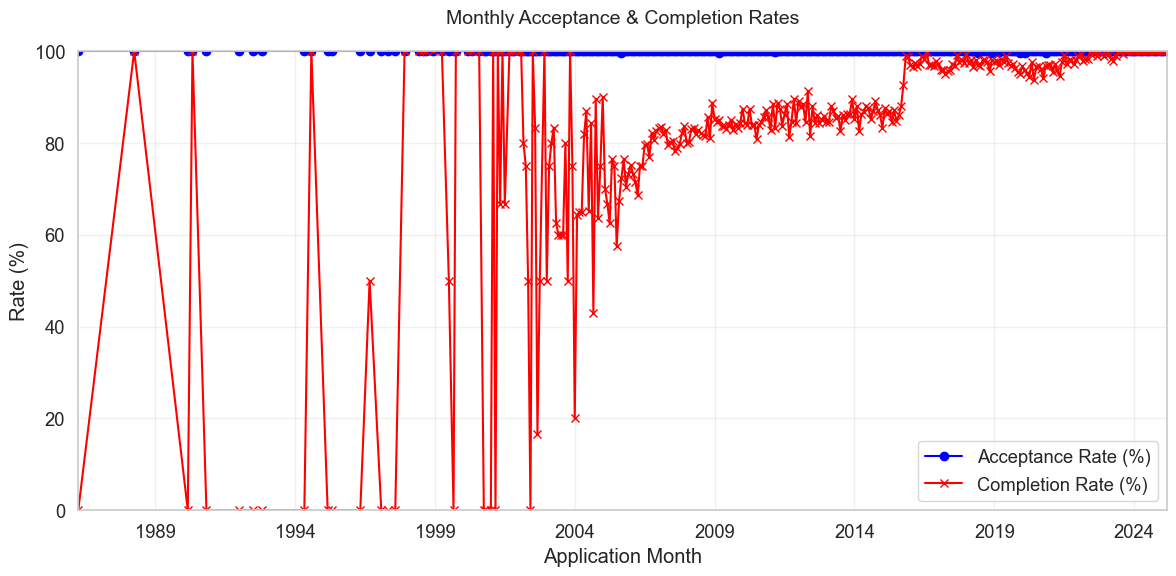

In [51]:
# Time - Based trends
# Monthly Acceptance/ Completion Rates

# Convert to Period for grouping
df['AppliedMonth'] = df['AppliedDate'].dt.to_period('M')

# Calculate rates
monthly_acceptance = (df.groupby('AppliedMonth')['IssuedDate'].count() / 
                      df.groupby('AppliedMonth').size() * 100)

monthly_completion = (df[df['IssuedDate'].notna()]  # Only accepted applications
                     .groupby('AppliedMonth')['CompletedDate'].count() / 
                     df.groupby('AppliedMonth')['IssuedDate'].count() * 100)

# Create plot
plt.figure(figsize=(12, 6))

# Plot acceptance rate (blue)
ax = monthly_acceptance.plot(color='blue', marker='o', label='Acceptance Rate (%)')

# Plot completion rate (red) on same axis
monthly_completion.plot(color='red', marker='x', ax=ax, label='Completion Rate (%)')

# Customize plot
plt.title("Monthly Acceptance & Completion Rates", pad=20, fontsize=14)
plt.xlabel("Application Month")
plt.ylabel("Rate (%)")
plt.ylim(0, 100)  # Ensure 0-100% scale
plt.grid(True, alpha=0.3)
plt.legend()

# Format x-axis labels
ax.set_xticks(ax.get_xticks())  # Ensure all ticks are shown
# ax.set_xticklabels([str(label) for label in monthly_acceptance.index], rotation=45)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Avg Processing Days by Month'}, xlabel='AppliedMonth'>

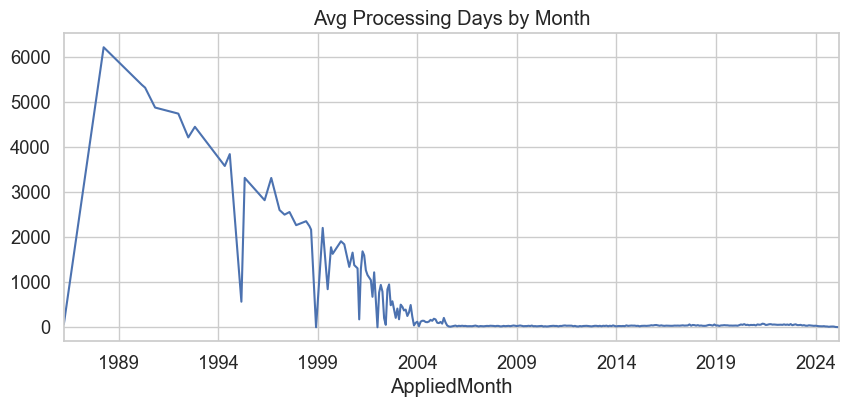

In [52]:
# Average Processing time by month
accepted_df = df[df['IssuedDate'].notna()]

# Monthly average processing time
monthly_processing = accepted_df.groupby('AppliedMonth')['ProcessingDays'].mean()
monthly_processing.plot(title="Avg Processing Days by Month", figsize=(10, 4))

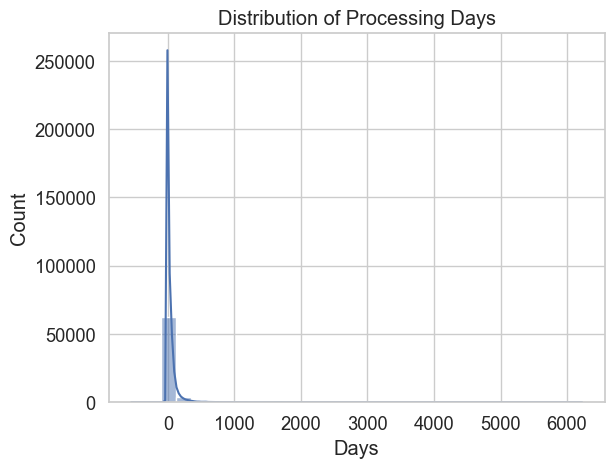

Top 10 Longest Processing Cases:
      AppliedDate IssuedDate  ProcessingDays
14237  1988-04-15 2005-05-02          6226.0
10847  1990-03-21 2004-12-23          5391.0
10505  1990-05-31 2004-12-30          5327.0
2802   1990-11-29 2004-04-14          4885.0
11586  1992-01-18 2005-01-19          4750.0
11102  1992-11-06 2005-01-19          4457.0
2014   1992-07-20 2004-02-09          4221.0
12631  1994-08-18 2005-03-03          3850.0
16700  1996-09-24 2007-01-31          3781.0
1724   2005-12-20 2016-01-12          3675.0


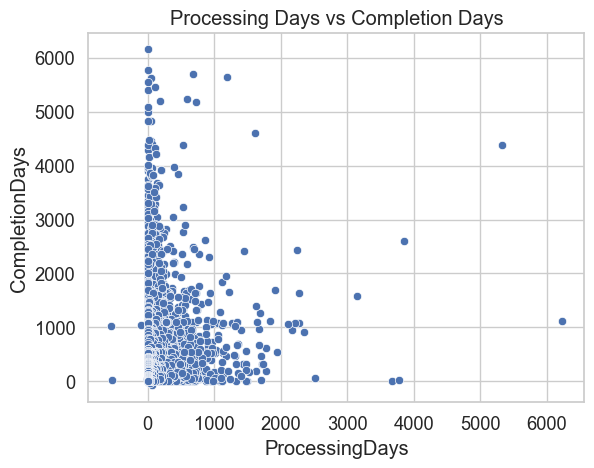

In [57]:
# Some Advance Insights of this Dates

# Distribution of Processing Times
sns.histplot(df['ProcessingDays'].dropna(), bins=30, kde=True)
plt.title("Distribution of Processing Days")
plt.xlabel("Days")
plt.show()

# Top 10 longest processing times
longest_processing = df.sort_values('ProcessingDays', ascending=False).head(10)[
    ['AppliedDate', 'IssuedDate', 'ProcessingDays']
]
print("Top 10 Longest Processing Cases:")
print(longest_processing)

# # Top 10 shortest processing times
# shortest_processing = df.sort_values('ProcessingDays').head(10)[
#     ['AppliedDate', 'IssuedDate', 'ProcessingDays']
# ]
# print("\nTop 10 Shortest Processing Cases:")
# print(shortest_processing)

# Correlation between processing and completion times
sns.scatterplot(data=df, x='ProcessingDays', y='CompletionDays')
plt.title("Processing Days vs Completion Days")
plt.show()

In [58]:
# export this data to csv
df.to_csv("date_analysis_results.csv", index=False)

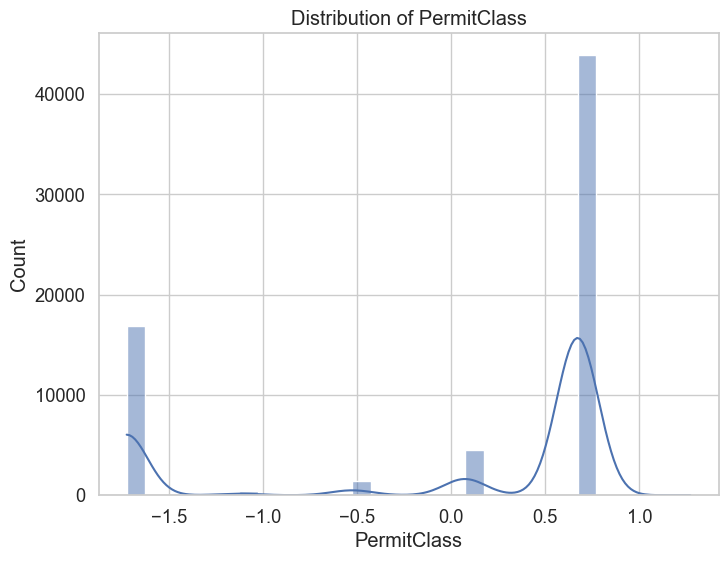

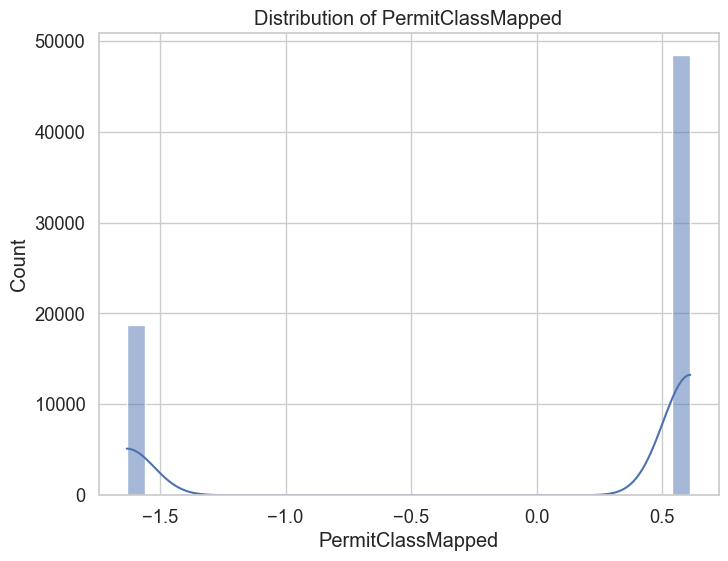

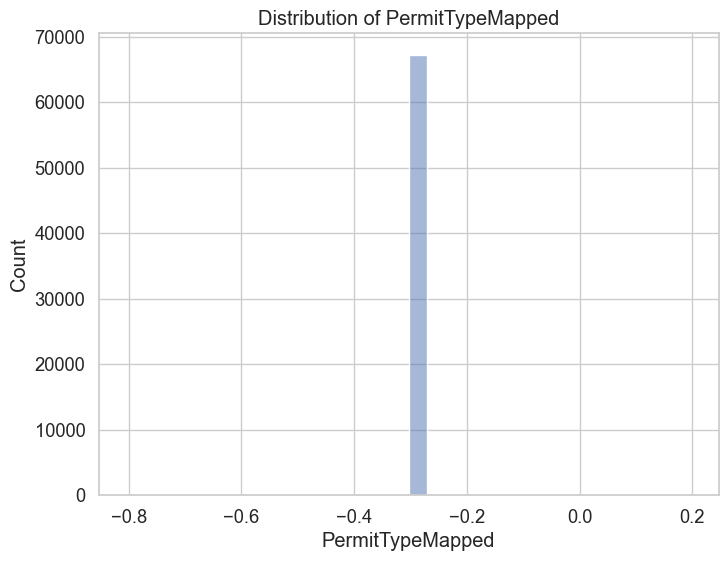

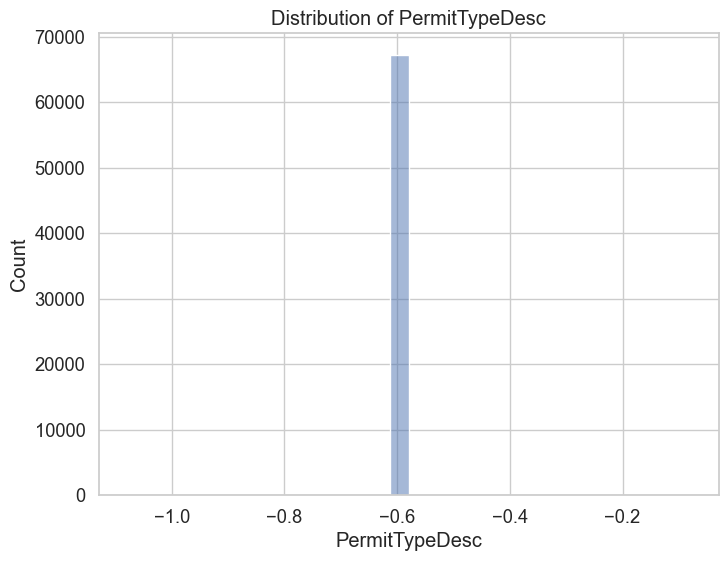

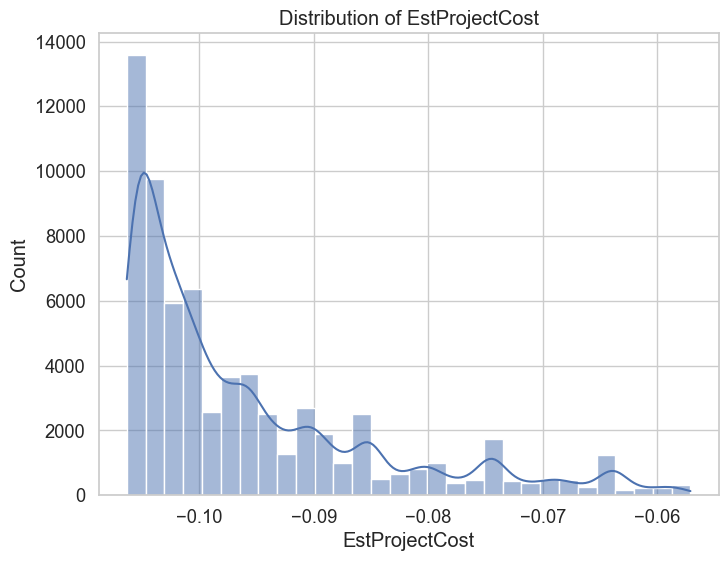

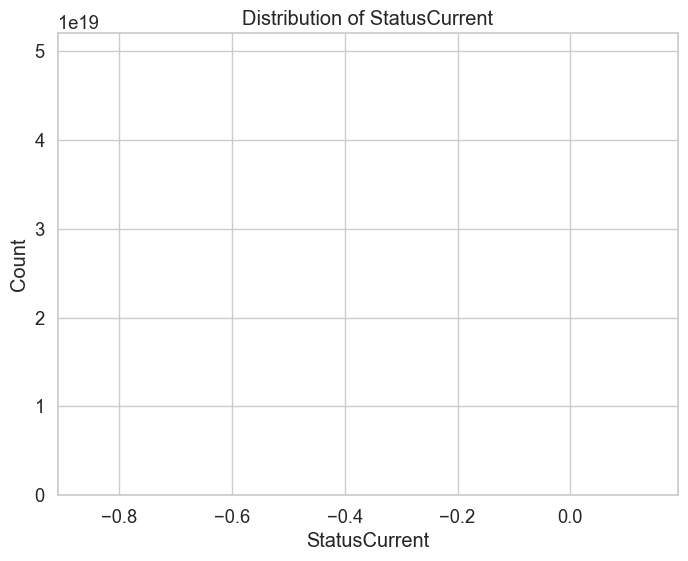

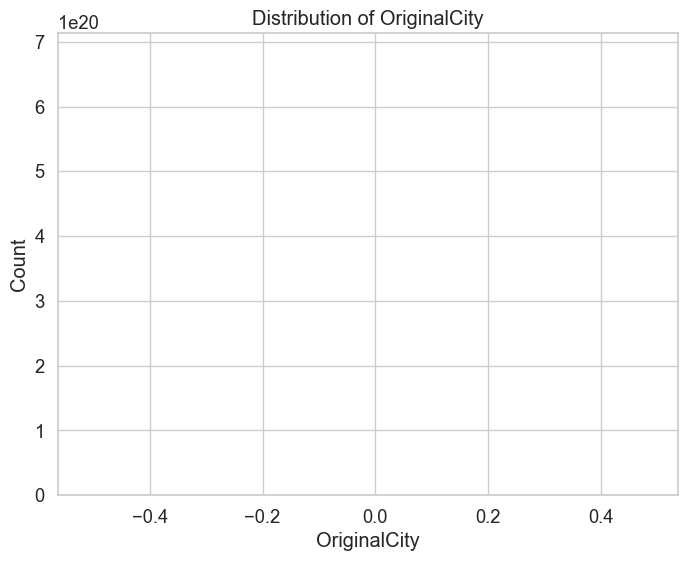

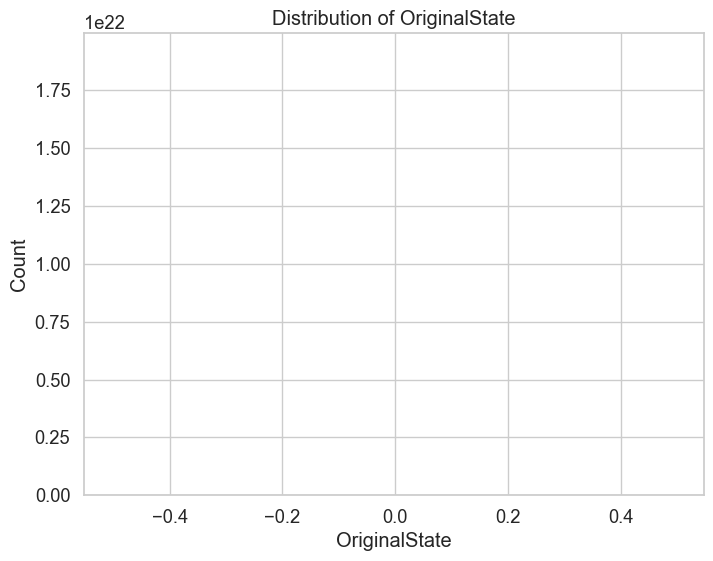

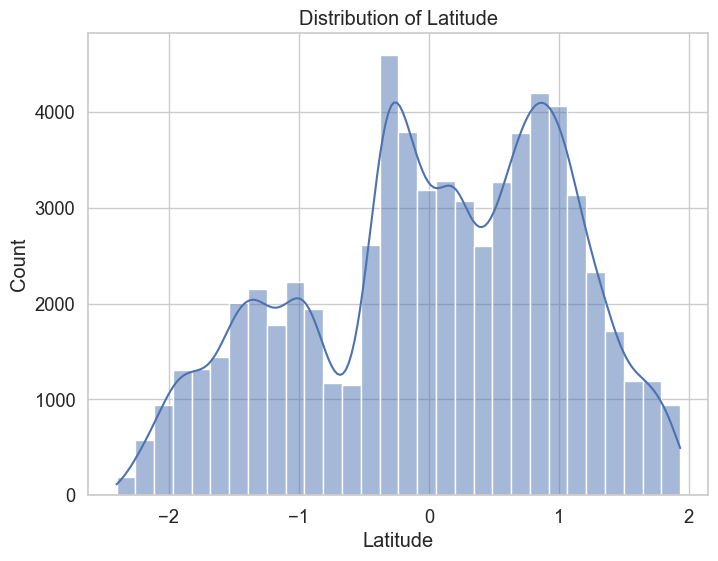

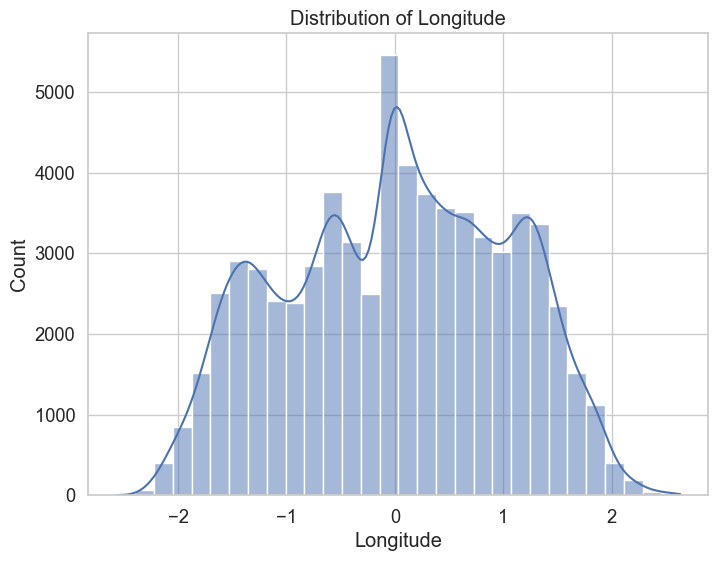

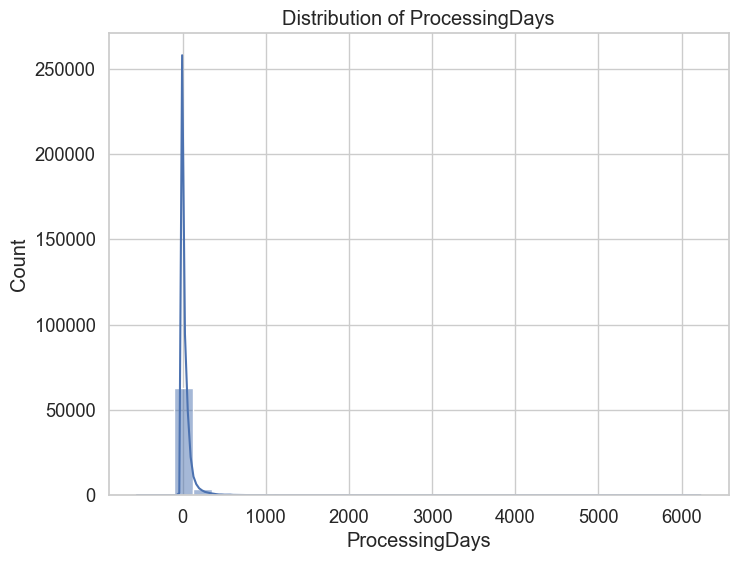

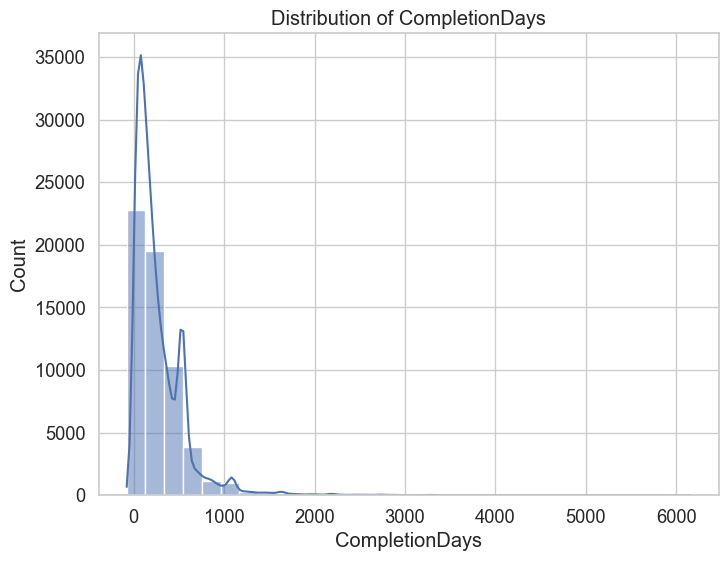

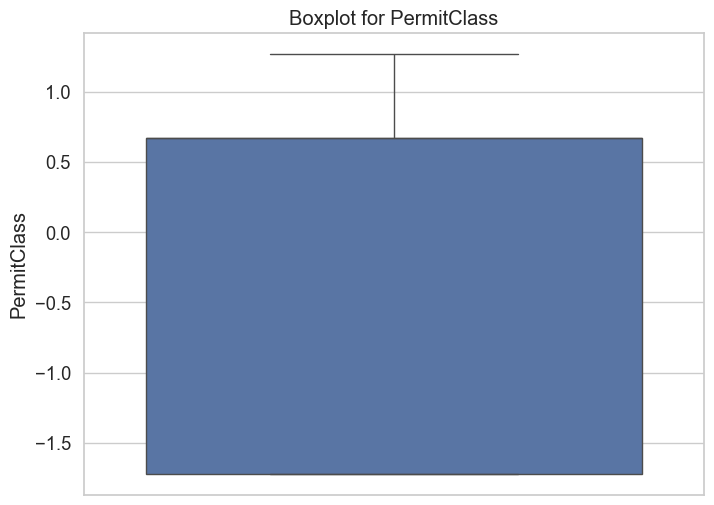

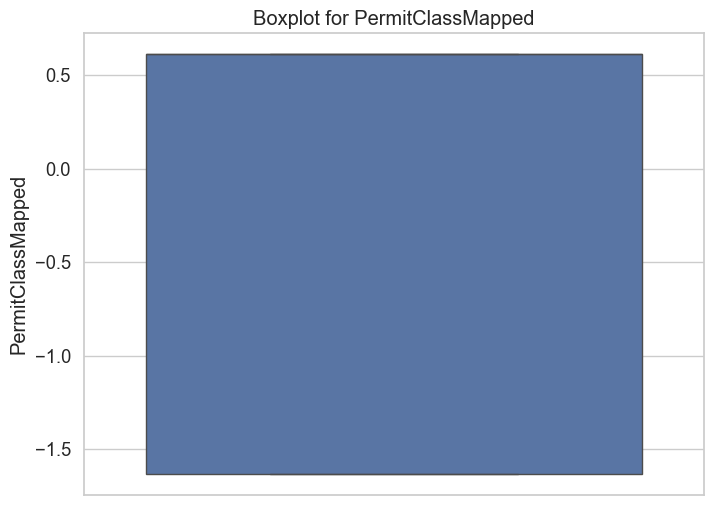

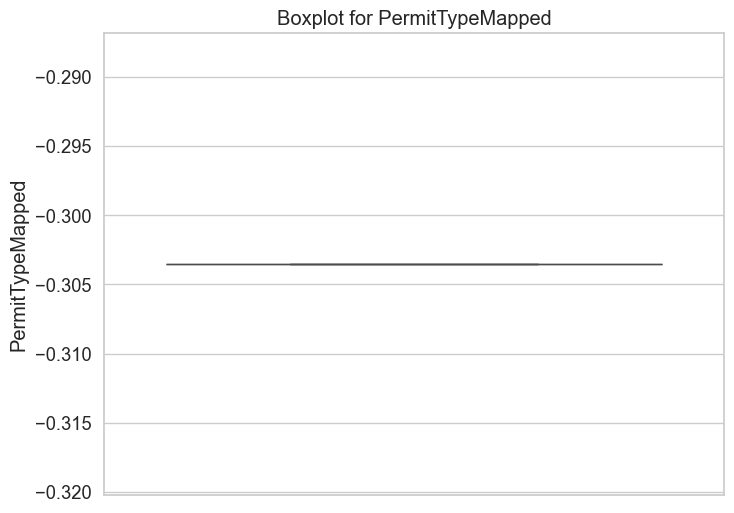

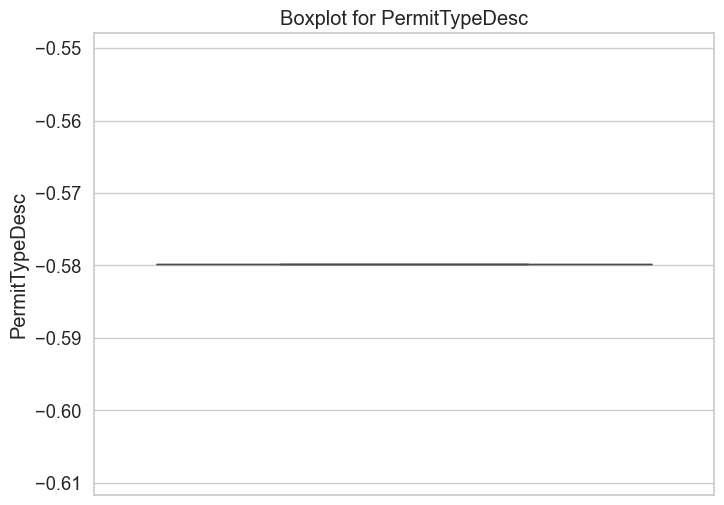

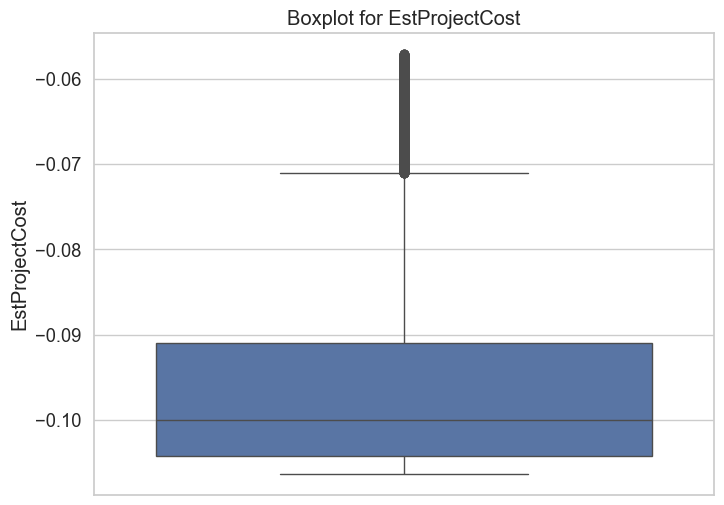

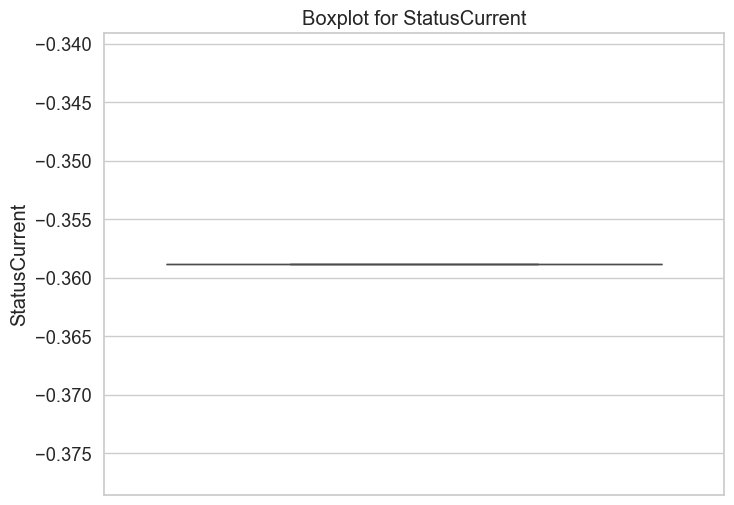

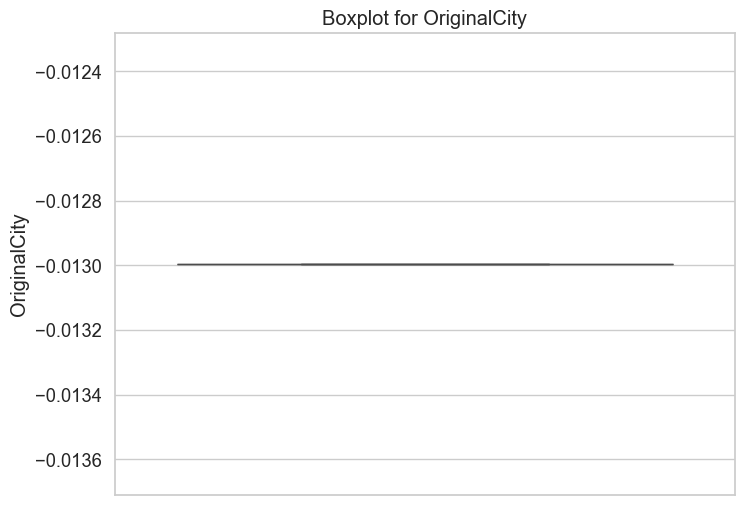

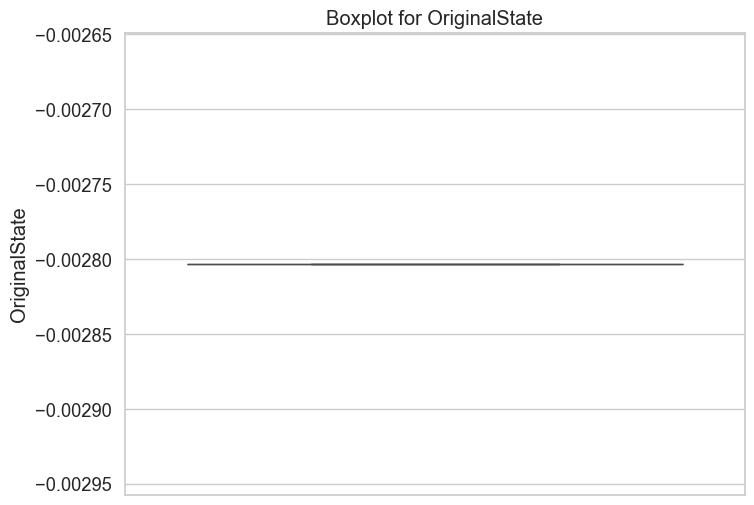

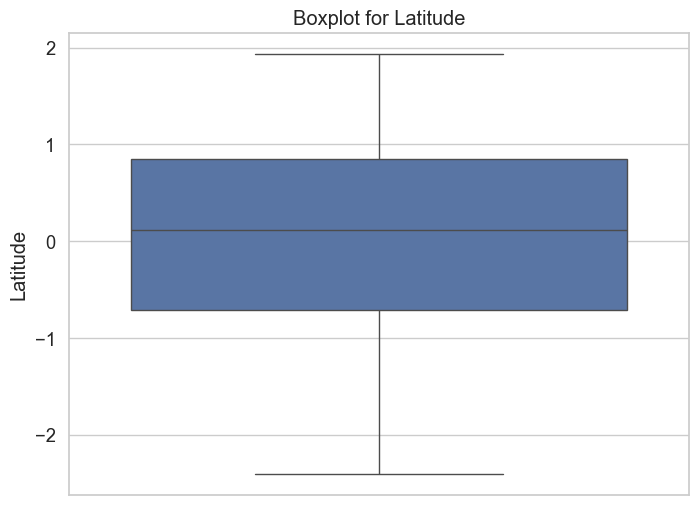

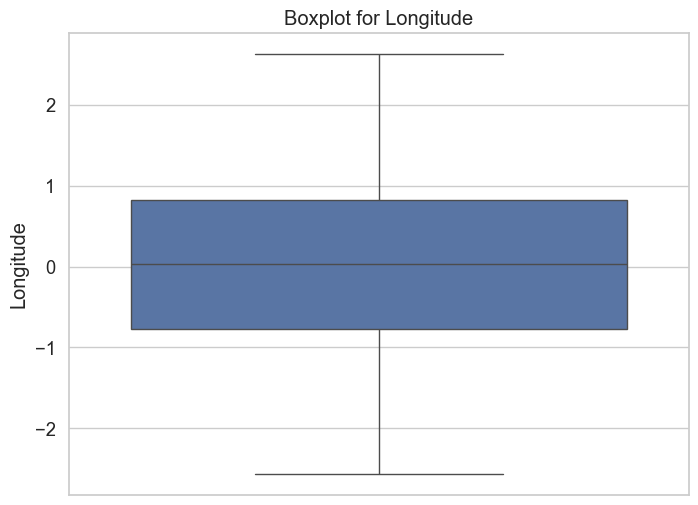

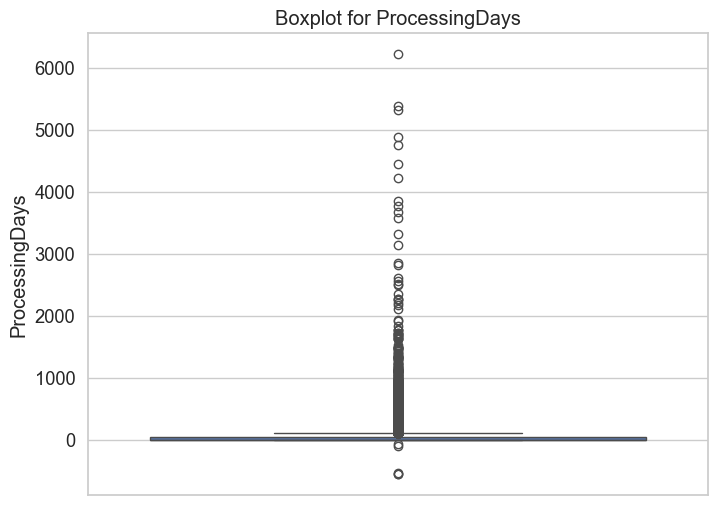

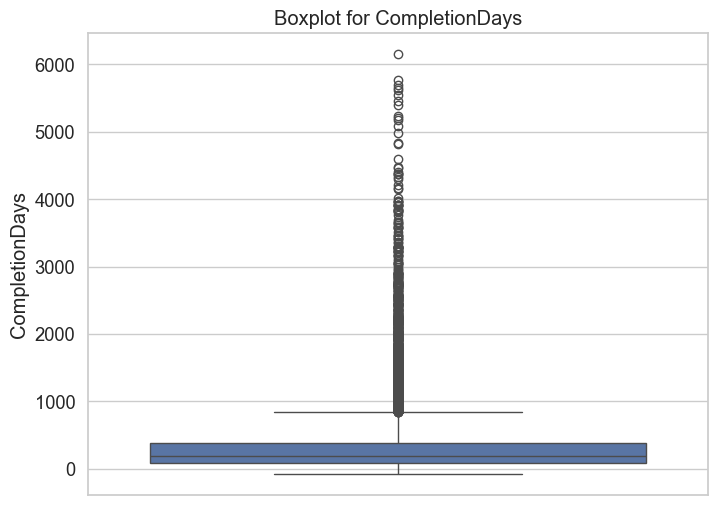

In [59]:
# Data Visualization Function
def data_visualization(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Distribution plots for numeric columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Boxplot for detecting outliers in numeric columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Call the function
data_visualization(df)

Dimensionality Reduction

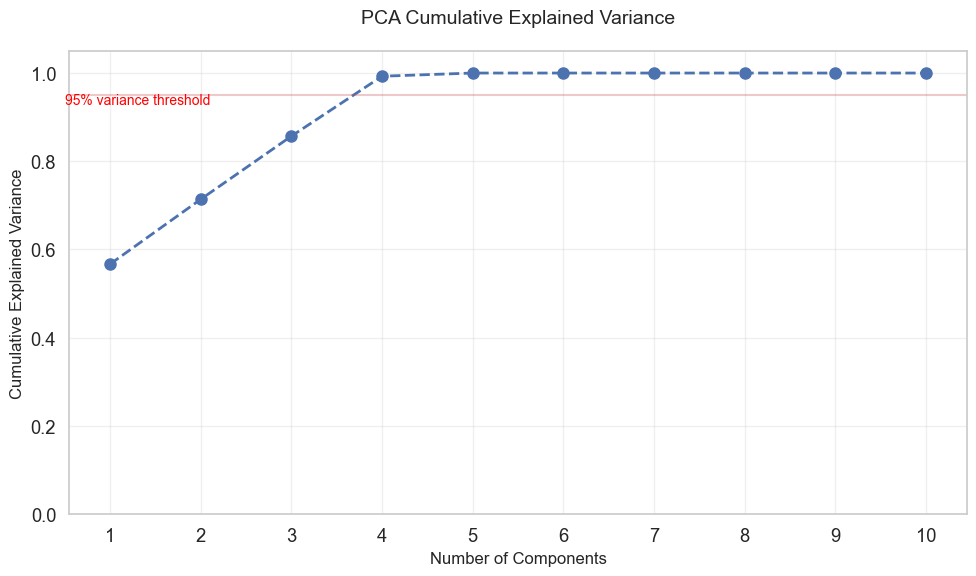

Total features: 17
Components needed for 95% variance: 4
Total variance with 10 components: 100.0%


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_analysis(X, n_components=10):
    """
    Perform PCA with imputation, scaling, and variance visualization
    
    Parameters:
        X : Input data (numpy array or pandas DataFrame)
        n_components : Number of PCA components to compute
    """
    # 1. Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    # 2. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    
    # 3. Apply PCA (auto-adjust components if too many requested)
    n_components = min(n_components, X_scaled.shape[1])
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # 4. Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components+1), 
             np.cumsum(pca.explained_variance_ratio_),
             marker='o',
             linestyle='--',
             color='b',
             markersize=8,
             linewidth=2)
    
    # Add threshold lines and annotations
    plt.axhline(y=0.95, color='r', linestyle='-', alpha=0.3)
    plt.text(0.5, 0.93, '95% variance threshold', color='red', fontsize=10)
    
    # Formatting
    plt.title('PCA Cumulative Explained Variance', pad=20, fontsize=14)
    plt.xlabel('Number of Components', fontsize=12)
    plt.ylabel('Cumulative Explained Variance', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, n_components+1))
    plt.ylim(0, 1.05)
    
    plt.tight_layout()
    plt.show()
    
    # Print key metrics
    print(f"Total features: {X_scaled.shape[1]}")
    print(f"Components needed for 95% variance: {np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1}")
    print(f"Total variance with {n_components} components: {np.cumsum(pca.explained_variance_ratio_)[-1]:.1%}")
    
    return X_pca, pca

# Usage example:
our_data = np.hstack([df[numeric_cols].values, df[categorical_cols].values])
X_pca, pca_model = perform_pca_analysis(our_data, n_components=10)

Model Training and Evaluation

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       150
           1       0.88      0.86      0.87       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

Confusion Matrix:
[[132  18]
 [ 21 129]]

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       150
           1       0.91      0.87      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

Confusion Matrix:
[[137  13]
 [ 20 130]]


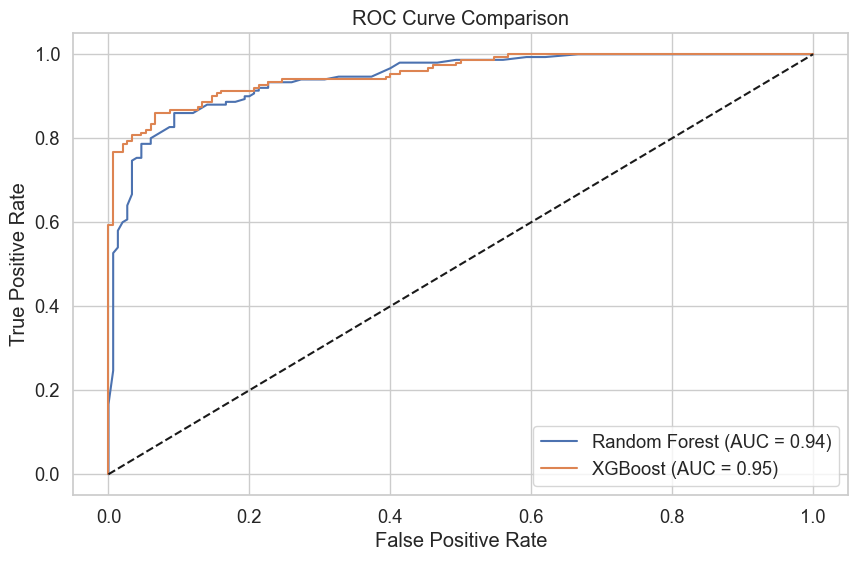

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load your data (replace this with your actual data loading)
# df = pd.read_csv('your_data.csv')

# Example with sample data if you don't have your data ready
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 1. Split into features (X) and target (y) if using your own DataFrame
# X = df.drop('target_column_name', axis=1)
# y = df['target_column_name']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

# 3. Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# 4. XGBoost
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# 5. ROC Curves
plt.figure(figsize=(10, 6))
for model, name in [(rf, 'Random Forest'), (xgb, 'XGBoost')]:
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


=== Random Forest Tuning ===
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       150
           1       0.86      0.88      0.87       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

AUC Score: 0.9380


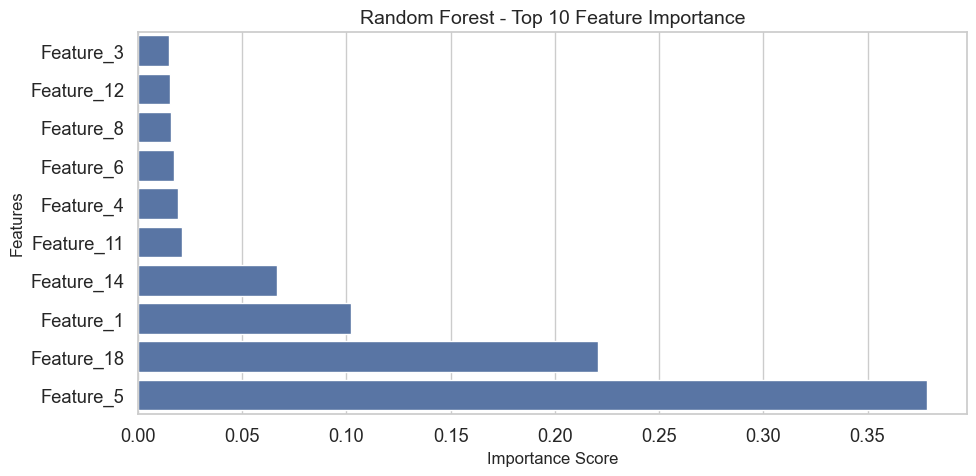


=== XGBoost Tuning ===
Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1.0, subsample=0.8; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1.0, subsample=0.8; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1.0, subsample=0.8; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1.0, subsample=0.8; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1.0, subsample=0.8; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1.0, subsample=1.0; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1.0, subsample=1.0; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, 

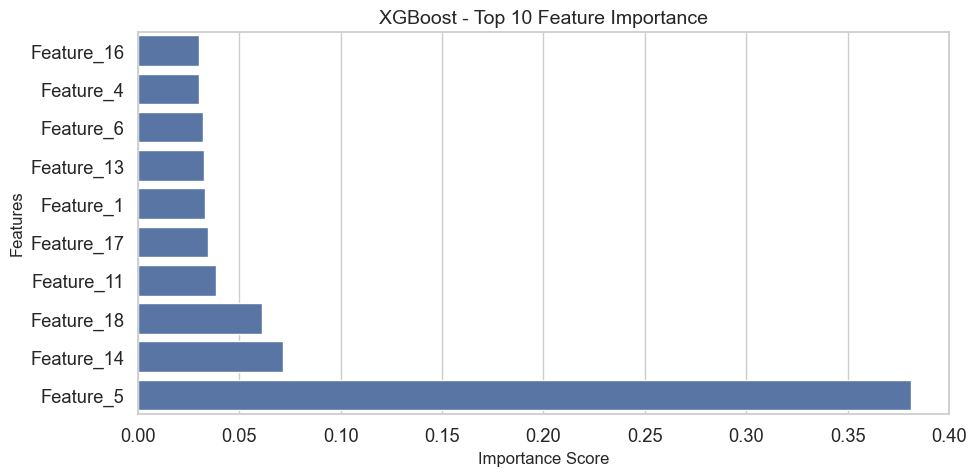

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Assuming you have:
# X_train, X_test, y_train, y_test already defined
# feature_names = list of your feature names (e.g., ['age', 'income', ...])

# If you don't have feature names, create generic ones
if 'feature_names' not in locals():
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# 1. Random Forest Hyperparameter Tuning
print("\n=== Random Forest Tuning ===")
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)
grid_rf.fit(X_train, y_train)

# Best RF model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("\nBest Parameters:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf))
print(f"AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

# RF Feature Importance (Top 10)
importances_rf = best_rf.feature_importances_
sorted_idx_rf = np.argsort(importances_rf)[-10:]  # Indices of top 10 features

# plt.figure(figsize=(10, 5))
# sns.barplot(x=importances_rf[sorted_idx_rf], y=np.array(feature_names)[sorted_idx_rf])
# plt.title("Random Forest - Top 10 Feature Importance", fontsize=14)
# plt.xlabel("Importance Score", fontsize=12)
# plt.ylabel("Features", fontsize=12)
# plt.tight_layout()
# plt.show()

# 2. XGBoost Hyperparameter Tuning
print("\n=== XGBoost Tuning ===")
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

param_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [scale_pos_weight]
}

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        n_jobs=-1
    ),
    param_grid=param_xgb,
    cv=5,
    scoring='roc_auc',
    verbose=2
)
grid_xgb.fit(X_train, y_train)

# Best XGB model
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\nBest Parameters:", grid_xgb.best_params_)
print(classification_report(y_test, y_pred_xgb))
print(f"AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")

# XGB Feature Importance (Top 10)
# importances_xgb = best_xgb.feature_importances_
# sorted_idx_xgb = np.argsort(importances_xgb)[-10:]  # Indices of top 10 features

# plt.figure(figsize=(10, 5))
# sns.barplot(x=importances_xgb[sorted_idx_xgb], y=np.array(feature_names)[sorted_idx_xgb])
# plt.title("XGBoost - Top 10 Feature Importance", fontsize=14)
# plt.xlabel("Importance Score", fontsize=12)
# plt.ylabel("Features", fontsize=12)
# plt.tight_layout()
# plt.show()

C:\Users\A R Mehra\AppData\Local\Temp\ipykernel_11780\4025891253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf[sorted_idx_rf],


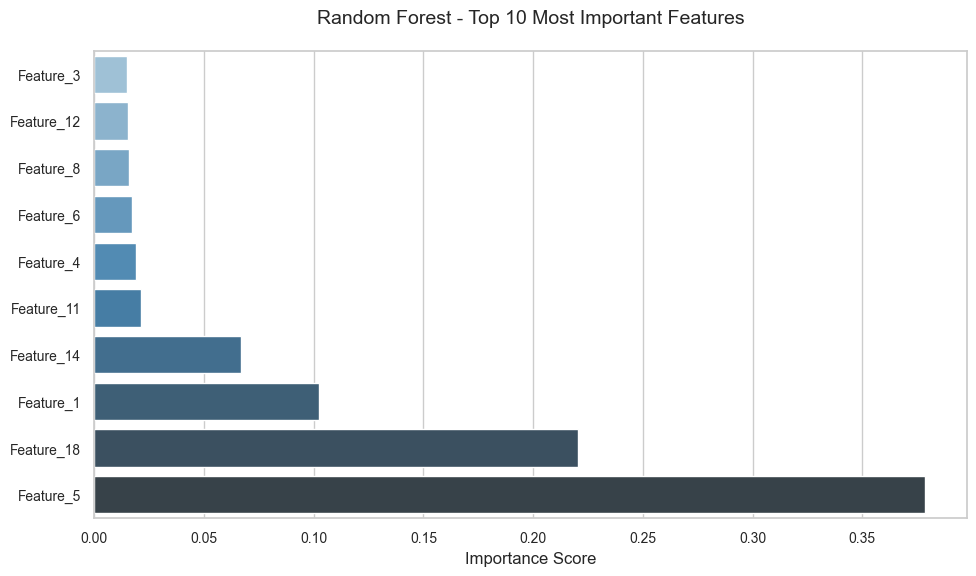

C:\Users\A R Mehra\AppData\Local\Temp\ipykernel_11780\4025891253.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_xgb[sorted_idx_xgb],


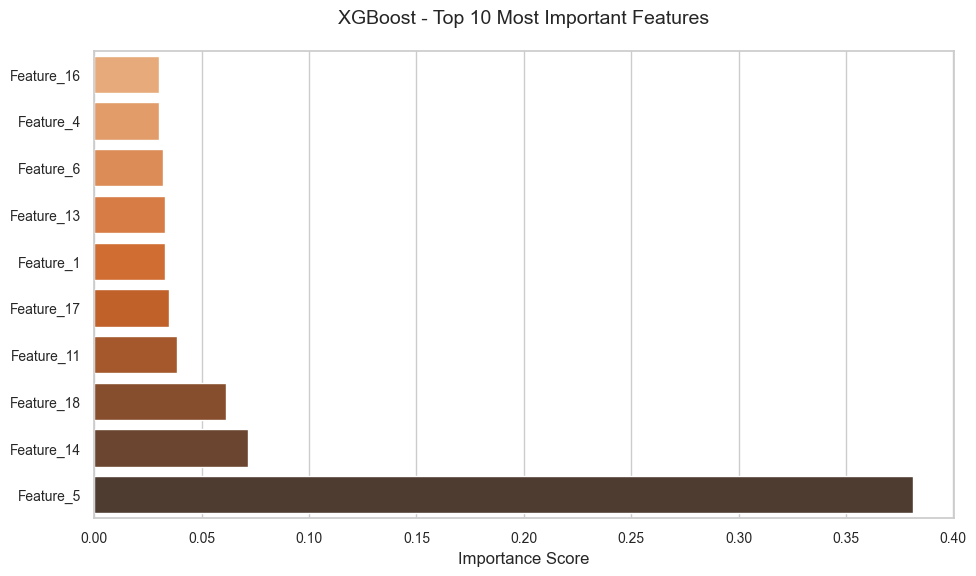

In [75]:
# For Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf[sorted_idx_rf], 
            y=np.array(feature_names)[sorted_idx_rf],
            palette='Blues_d')
plt.title("Random Forest - Top 10 Most Important Features", fontsize=14, pad=20)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# For XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_xgb[sorted_idx_xgb], 
            y=np.array(feature_names)[sorted_idx_xgb],
            palette='Oranges_d')
plt.title("XGBoost - Top 10 Most Important Features", fontsize=14, pad=20)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 1. DATA PREPARATION
# Assuming you have:
# X_train, X_test, y_train, y_test already defined
# If X_train is a DataFrame:
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
# If X_train is numpy array but from a DataFrame:
else:
    feature_names = original_df.columns.tolist()  # Use your original DataFrame

# 2. RANDOM FOREST TUNING
print("\n=== Random Forest Hyperparameter Tuning ===")
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)
grid_rf.fit(X_train, y_train)

# Best RF model evaluation
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("\nBest Parameters:", grid_rf.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"\nAUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

# RF Feature Importance (Top 10)
importances_rf = best_rf.feature_importances_
sorted_idx_rf = np.argsort(importances_rf)[-10:]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf[sorted_idx_rf], y=np.array(feature_names)[sorted_idx_rf], palette='Blues_d')
plt.title("Random Forest - Top 10 Feature Importance", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

# 3. XGBOOST TUNING
print("\n=== XGBoost Hyperparameter Tuning ===")
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

param_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [scale_pos_weight]
}

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        n_jobs=-1
    ),
    param_grid=param_xgb,
    cv=5,
    scoring='roc_auc',
    verbose=2
)
grid_xgb.fit(X_train, y_train)

# Best XGB model evaluation
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\nBest Parameters:", grid_xgb.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print(f"\nAUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")

# XGB Feature Importance (Top 10)
importances_xgb = best_xgb.feature_importances_
sorted_idx_xgb = np.argsort(importances_xgb)[-10:]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_xgb[sorted_idx_xgb], y=np.array(feature_names)[sorted_idx_xgb], palette='Oranges_d')
plt.title("XGBoost - Top 10 Feature Importance", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'original_df' is not defined